In [1]:
# Preliminaries
SRC_PATH = '../../src/'
DATA_PATH = '../../Rwanda/raw_data/'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

from IPython.display import Image
import os,sys

sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import COLOR_SCHEME, TIER_COLORS

# load data
main = pd.read_excel('../../Rwanda/raw_data/main.xlsx')

# important variables
n_households = len(main)
provinces = np.unique(main['Province'])

main_source_question = 'C182_which is the source that you use most of the time'
source_labels = [1,2,3,4,6,7]
source_names = ["National Grid","Local Mini Grid","Generator","Solar Home System","Rechargeable Battery","Pico-Hydro"]

# The Multi-tier framework for measuring energy access



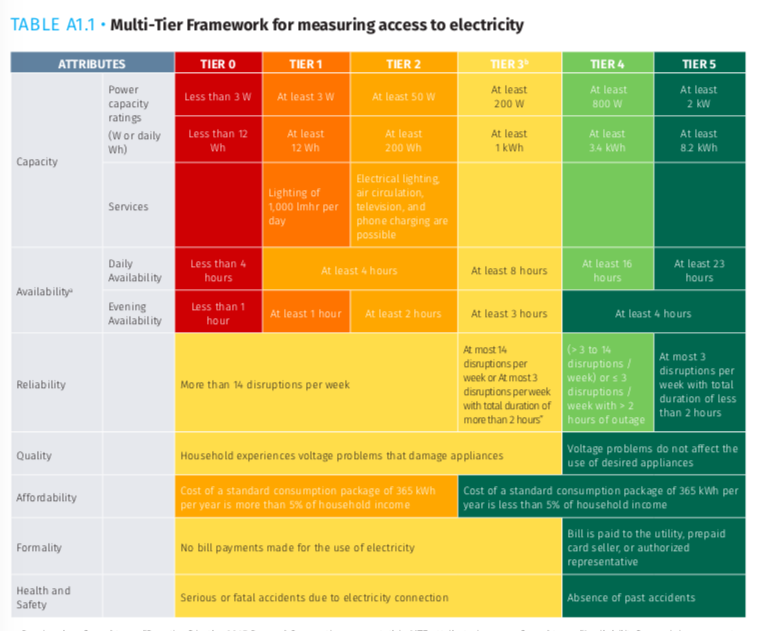

In [2]:
Image('../images/MTF_electricity.png')

## Health & Safety

We consider the question: **In the last 12 months, did any household members die or have permanent limb (bodily injury) damage because of the electricity ?**

##### Type of electicity  and its related security question:

- 1- Electricity from National Grid C41
- 2- Electricity from Mini Grid C83
- 3- Electric geneator set C112
- 4- Rechargeable Battery C130
- 5- Pico-Hydro C142
- 6- Solar device C175


* 7- Lamp/Candle (with fuel and not electricity) ? In the last 12 months, what type of harm/injury did any household members have from [LAMP/ CANDLE]? F14





In [3]:
# Question related to safety/ injuries/damages during a typical month 
question_safety = {
    "National Grid": 'C41_household member died or damaged because of electricity',
    "Local Mini Grid": 'C83_household members die or injured because of the grid electricity',
    "Generator": 'C112_household members died or injured because of the generator',
    "Solar Home System": 'C175_household members died or  injured because of the DEVICE',
    "Rechargeable Battery":'C130_household members died  injured because of the rechargeable batteries',
    "Pico-Hydro": 'C142_household members died injured because of the pico-hydro system'
}

## Availability 

We consider the questions of type:
- **How many hours of electricity are available each day and night from the grid? (max 24 hours)**
- **How many hours of electricity are available each evening, from 6:00 pm to 10:00 pm from the grid?(max 4 hours)**

Note that each households only answers depending on the main electricity source.


In [4]:
# Questions related to availability during a typical month

question_availability = {
    
    "National Grid": {
        'day': 'C26b_hours of electricity availability each day and night (Typical Months)',
        'night': 'C27b_hours electricity is available each evening (Typical Month)'
    },
    
    "Local Mini Grid": {
        'day': 'C68b_hours of electricity availability each day and night (Typical Months)',
        'night': 'C69b_hours of electricity availability each evening (Typical Months)',
    },
    
    "Generator": {
        'day': 'C107b_hours could you use this generator each day and night  (Typical Months)',
        'night': 'C108b_hours could you use this generator each evening (Typical Months)'
    },
    
    "Solar Home System": {
        'day': 'C172b_hours you receive service from this DEVICE each day and night (Typical Months)',
        'night': 'C173b_C173a_hours is service available from this DEVICE each evening (Typical Months)'
    },
    
    "Pico-Hydro":{
        'day': 'C137b_hours you could use this pico-hydro system each day and night (Typical Months)',
        'night': 'C138b_hours you could use this pico-hydro system each evening (Typical Months)'
    } 
}


In [5]:
E_safety_tier = []
E_Availability_tier_daily = []
E_Availability_tier_evening = []

for index,row in main.iterrows():
    
    # We first compute the relevant value depending on the main source, then we
    # check the corresponding tier (this second part can be done source-independently)
    if row[main_source_question]==1:
        injury = row[question_safety["National Grid"]]
        h_day = row[question_availability["National Grid"]["day"]]
        h_evening = row[question_availability["National Grid"]["night"]]
        
    elif row[main_source_question]==2:
        injury = row[question_safety["Local Mini Grid"]]
        h_day = row[question_availability["Local Mini Grid"]["day"]]
        h_evening = row[question_availability["Local Mini Grid"]["night"]]
        
    elif row[main_source_question]==3:
        injury = row[question_safety["Generator"]]
        h_day = row[question_availability["Generator"]["day"]]
        h_evening = row[question_availability["Generator"]["night"]]
        
    elif row[main_source_question] == 4 or row[main_source_question] == 5:
        injury = row[question_safety["Solar Home System"]]
        h_day = row[question_availability["Solar Home System"]["day"]]
        h_evening = row[question_availability["Solar Home System"]["night"]]
        
    elif row[main_source_question] == 6:
        injury = row[question_safety["Rechargeable Battery"]]
        h_day = np.nan #row[question_availability["Rechargeable Battery"]["day"]]
        h_evening = np.nan #row[question_availability["Rechargeable Battery"]["night"]]
        
    elif row[main_source_question] == 7:
        injury = row[question_safety["Pico-Hydro"]]
        h_day = row[question_availability["Pico-Hydro"]["day"]]
        h_evening = row[question_availability["Pico-Hydro"]["night"]]
    
    else:
        injury = np.nan
        h_day = np.nan
        h_evening = np.nan
        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # SAFETY
    if injury==1:
        E_safety_tier.append(3)
    elif injury==2:
        E_safety_tier.append(5)
    else:
        E_safety_tier.append(np.nan)
    
    # AVAILABILITY
    if h_day < 4:
        E_Availability_tier_daily.append(0)
    elif h_day < 8:
        E_Availability_tier_daily.append(2)
    elif h_day < 16:
        E_Availability_tier_daily.append(3)
    elif h_day < 23:
        E_Availability_tier_daily.append(4)
    elif h_day >= 23:
        E_Availability_tier_daily.append(5)
    else:
        E_Availability_tier_daily.append(np.nan)
    
    if h_evening < 1:
        E_Availability_tier_evening.append(0)
    elif h_evening < 2:
        E_Availability_tier_evening.append(1)
    elif h_evening < 3:
        E_Availability_tier_evening.append(2)
    elif h_evening < 4:
        E_Availability_tier_evening.append(3)
    elif h_evening >= 4:
        E_Availability_tier_evening.append(5)
    else:
        E_Availability_tier_evening.append(np.nan)
        
main['E_Safety'] = E_safety_tier
main['E_Availability_day'] = E_Availability_tier_daily 
main['E_Availability_night'] = E_Availability_tier_evening
main['E_Availability'] = min(E_Availability_tier_daily,E_Availability_tier_evening)

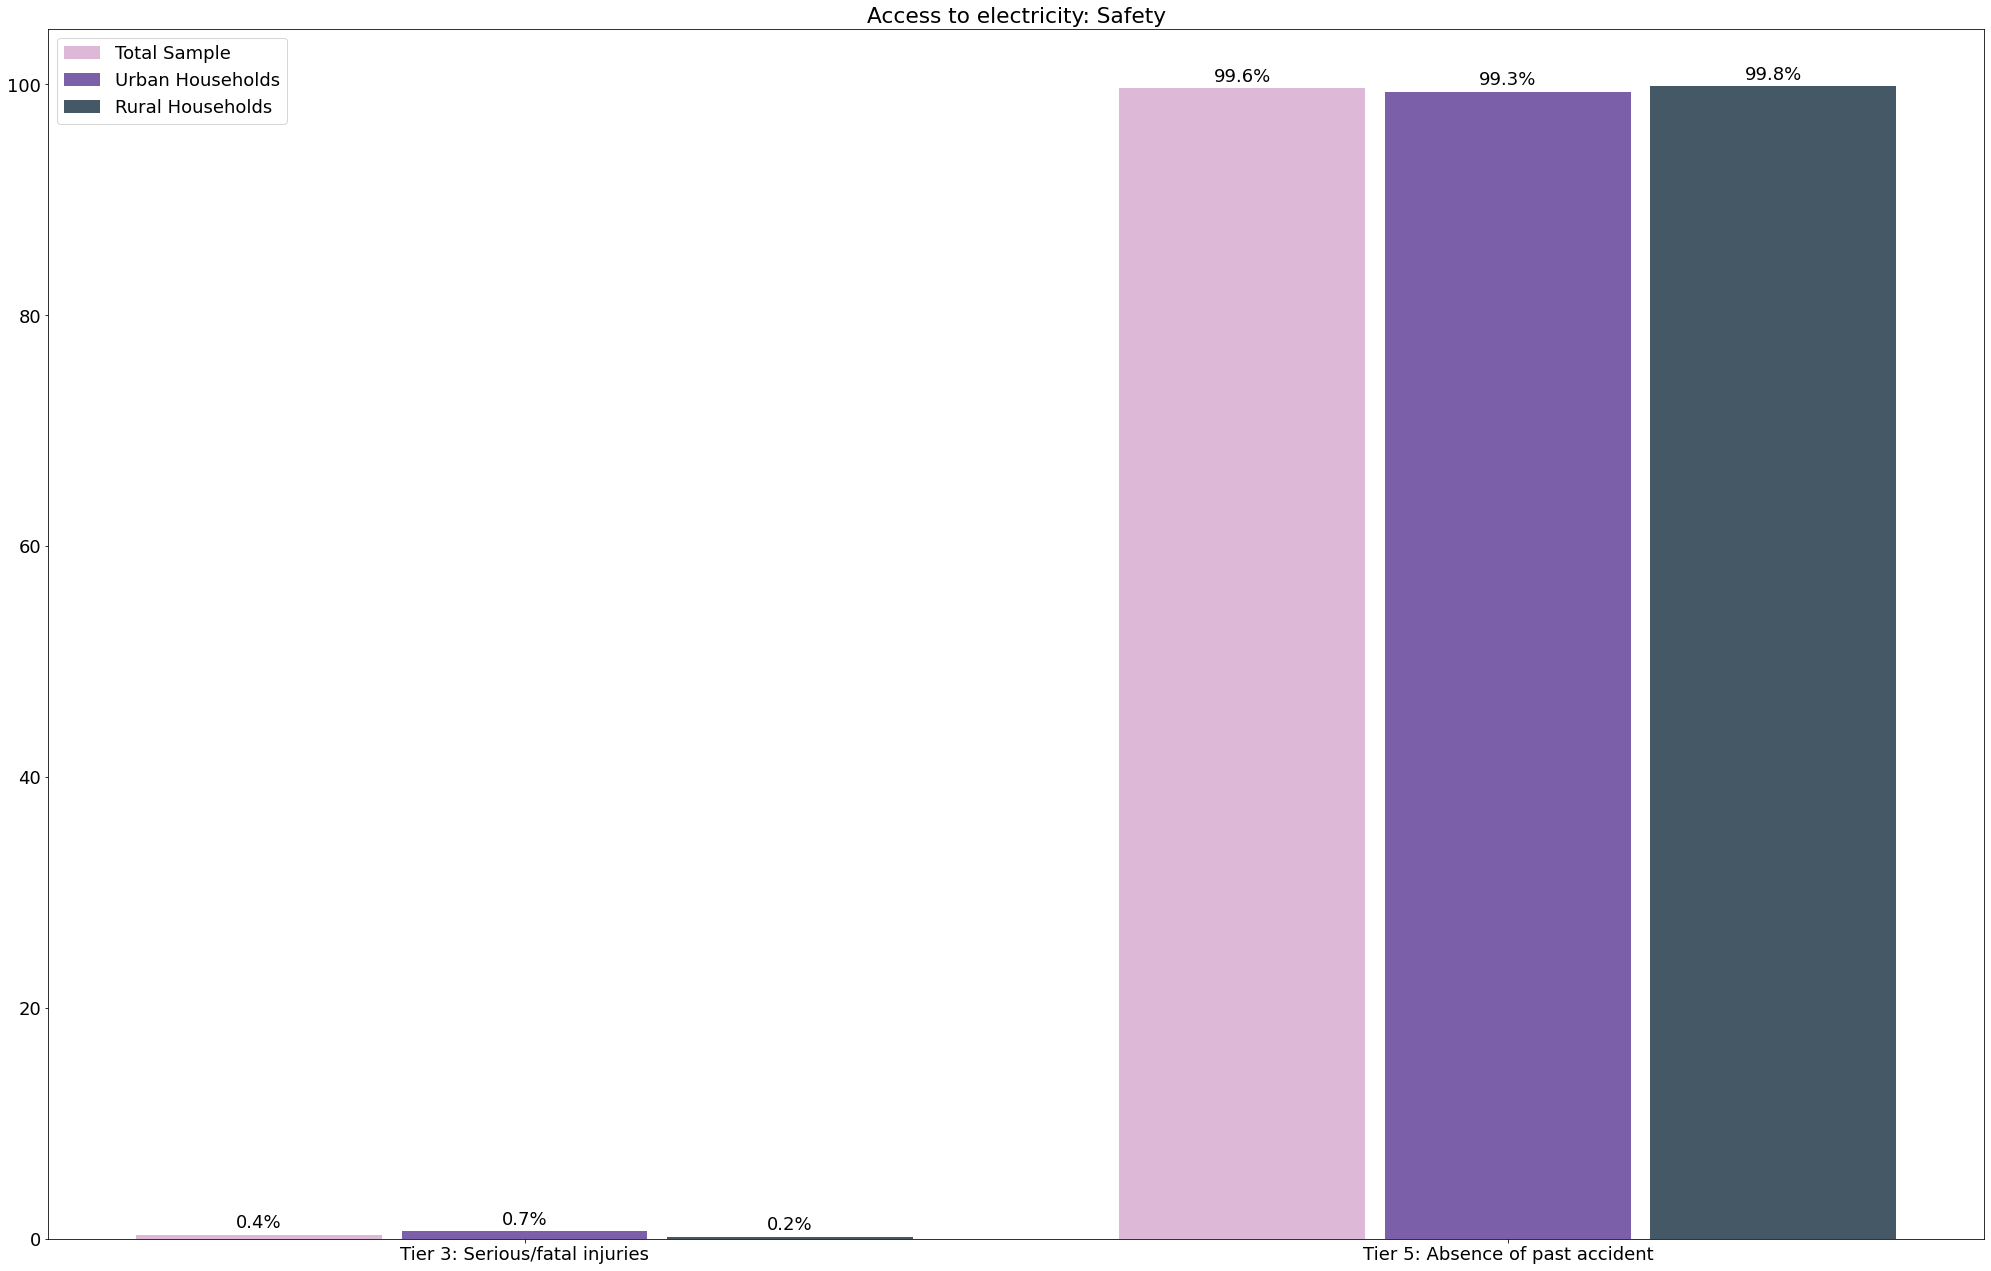

In [6]:
plot_tier_distribution(main,'E_Safety',values=[3,5],
                       labels= ['Tier 3: Serious/fatal injuries', 'Tier 5: Absence of past accident'],
                       title='Access to electricity: Safety')


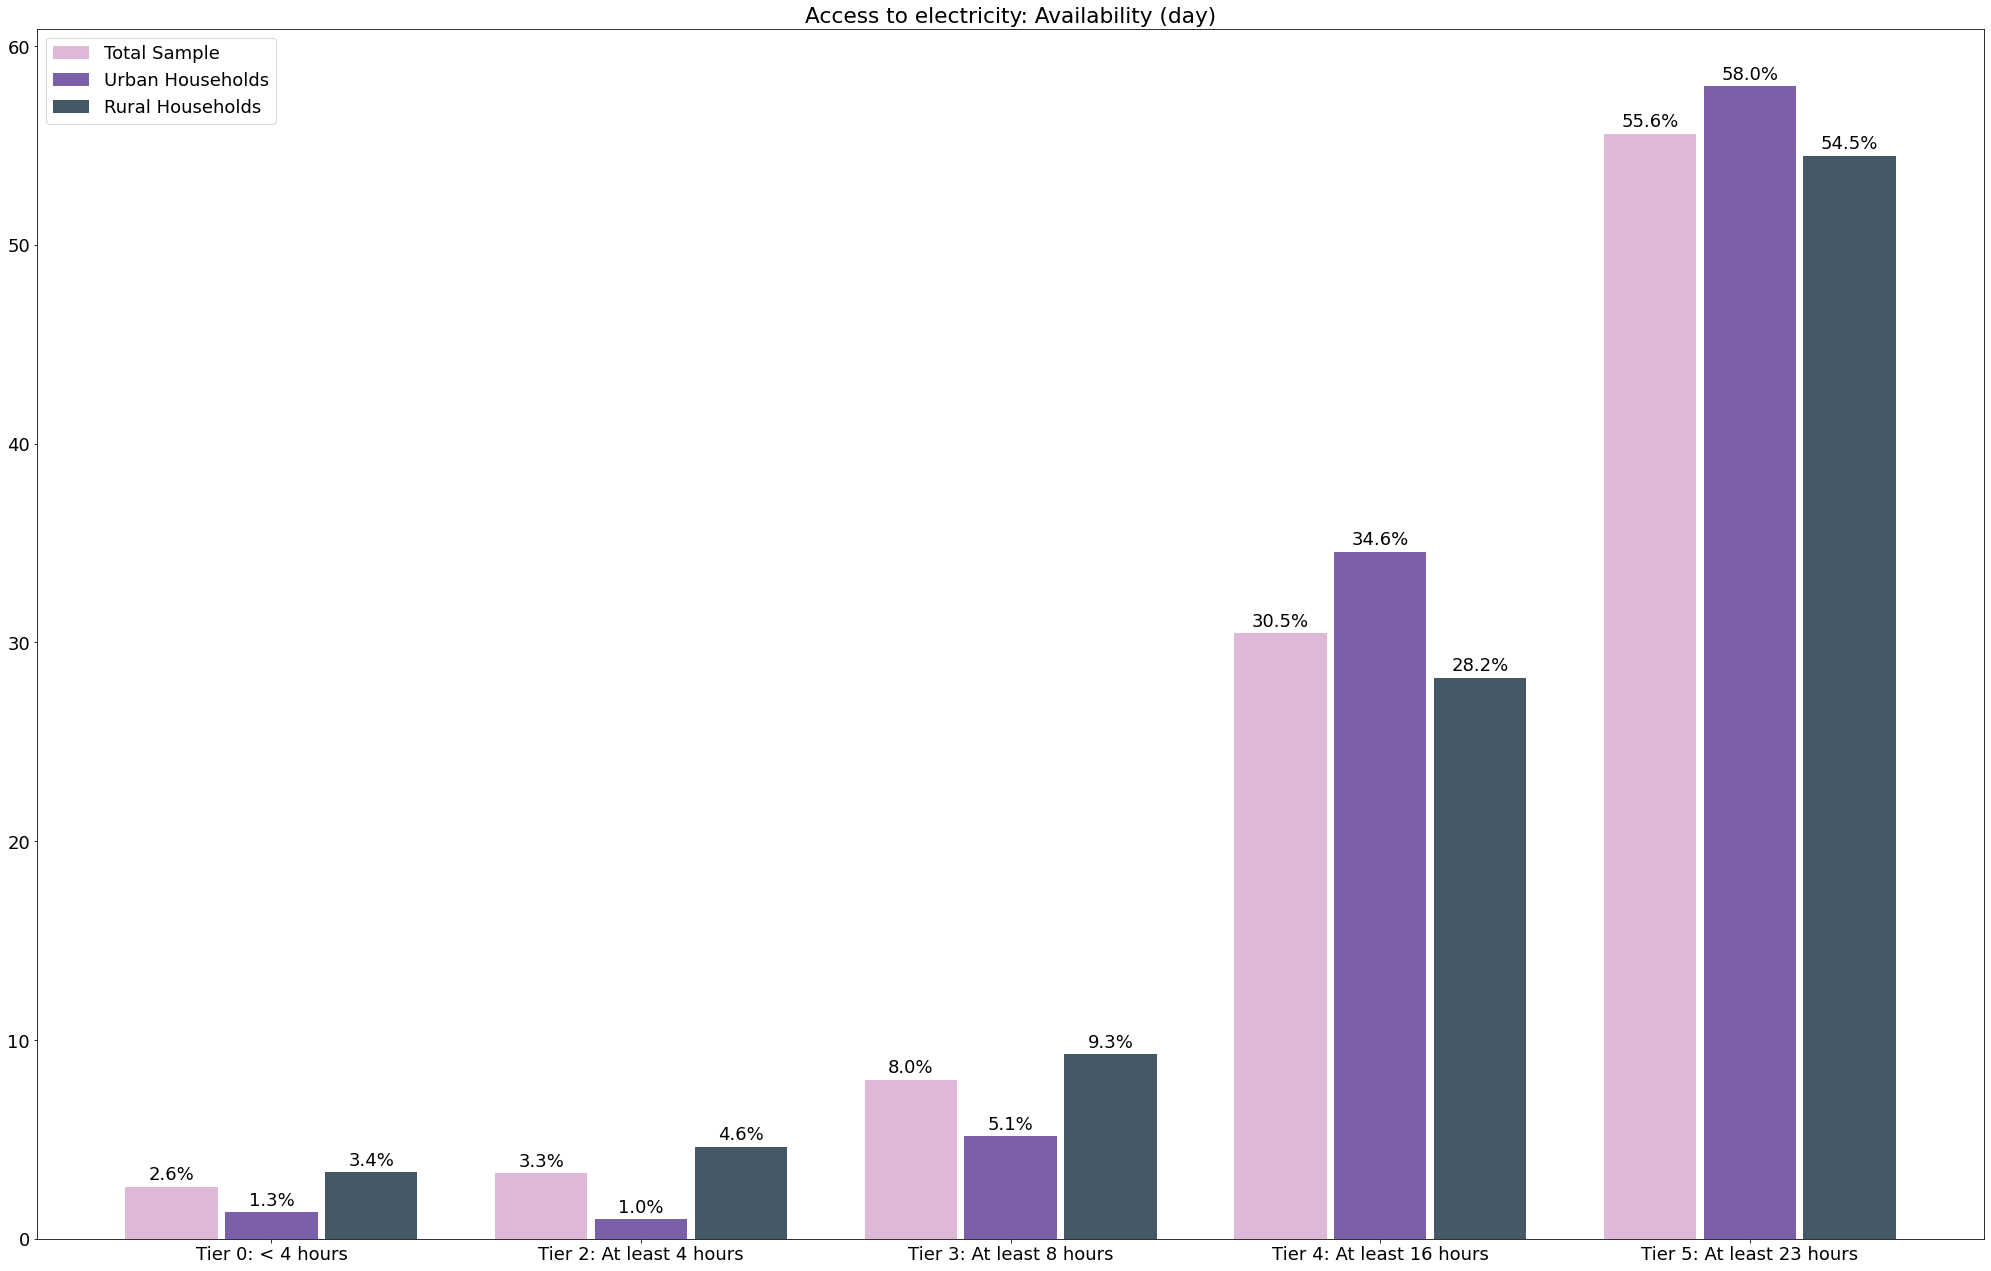

In [7]:
plot_tier_distribution(main,'E_Availability_day',values= [0,2,3,4,5],
                       labels= ['Tier 0: < 4 hours', 'Tier 2: At least 4 hours', 'Tier 3: At least 8 hours', 'Tier 4: At least 16 hours','Tier 5: At least 23 hours' ],
                       title='Access to electricity: Availability (day)')


### Comments:

The results are quite close to the MTF report:

**MTF report:**
- Nationwide: 5.9% - 7.0% - 10.1%- 27.5 % - 49.6%
- Urban: 1.4% - 2.7% - 8.4.1%- 30.7 % - 56.8%


**Our analysis:**
- Nationwide: 2.6% - 3.3% - 8.1% - 30.4% - 55.6%
- Urban: 1.3% - 1.0% - 5.1% - 34.6% - 58.0%

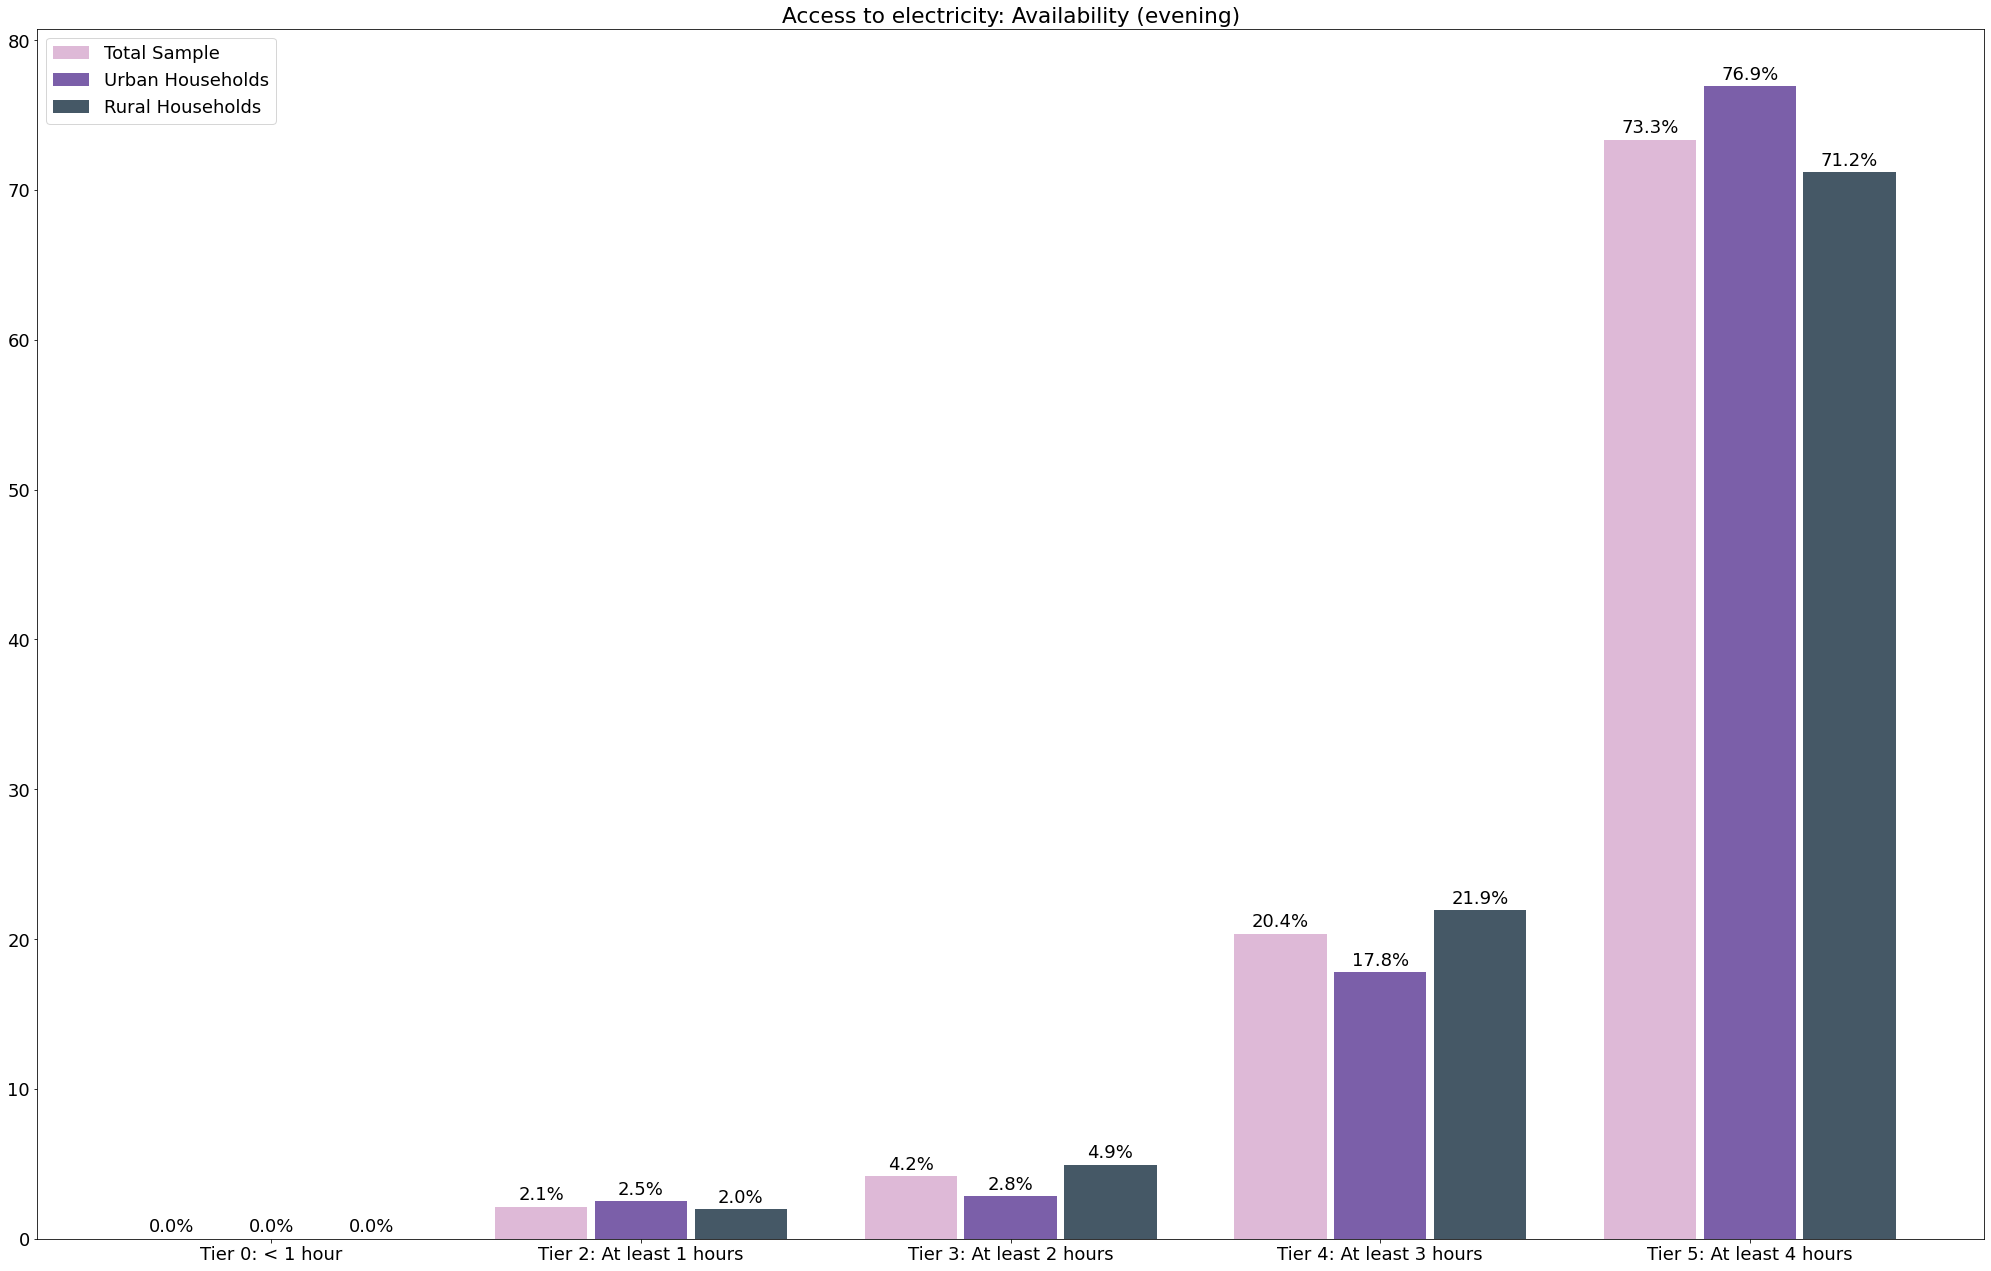

In [8]:
plot_tier_distribution(main,'E_Availability_night',values= [0,1,2,3,5],
                       labels= ['Tier 0: < 1 hour','Tier 2: At least 1 hours', 'Tier 3: At least 2 hours', 'Tier 4: At least 3 hours','Tier 5: At least 4 hours' ],
                       title='Access to electricity: Availability (evening)')

### Comments:

The results are in line with those from the MTF report:

**MTF report:**
- Nationwide: 3.1% - 3.7% - 21.3%- 71.9%
- Urban: 1.2% - 2.1% - 20.7 % - 76.0%

**Here:**

- Nationwide: 2.1% - 4.2% - 20.4% - 73.3% 
- Urban: 2.5% - 2.8% - 17.8% - 76.9%



## Reliability

We consider the questions of type:
- **In a typical day, how many outages/blackouts of the [electric source] happen ?**
- **In a typical day and night (24 hours), what was the total duration of all the outages/blackouts?**

Note that each households only answers depending on the main electricity source.


In [9]:
# Questions related to reliability during a typical month

question_reliability = {
    "National Grid":
        {'outages':"C29b_how many outages/blackouts of the grid happen (Typical Months)",
         'duration': "C30b_what was the total duration of all the outages/blackouts (Typical Months)"},
    
    "Local Mini Grid":
        {'outages':"C71b_outages/blackouts of the mini-grid (Typical Months)",
         'duration': "C72b_total duration of all the outages/blackouts (Typical Months)"},

}


In [10]:
E_Reliability_tier = []

for index,row in main.iterrows():
    
    if row[main_source_question]==1:
        n_outages = row[question_reliability["National Grid"]["outages"]]
        total_duration = row[question_reliability["National Grid"]["duration"]]
        
    elif row[main_source_question]==2:
        n_outages = row[question_reliability["Local Mini Grid"]['outages']]
        total_duration = row[question_reliability["Local Mini Grid"]["duration"]]
    
    else:
        n_outages = np.nan
        total_duration = np.nan
        
        
    # try to fix the mix between minutes and hours in the answer:
    # if the answer is > 24, then we assume they gave minutes
    if total_duration>24:
        total_duration = total_duration/60
        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # number of interruptions 
    if n_outages <= 3:
        if total_duration < 2:
            E_Reliability_tier.append(5)
        else:
            E_Reliability_tier.append(4)
    
    elif n_outages <= 14:
        E_Reliability_tier.append(4)

    elif n_outages > 14:
        E_Reliability_tier.append(3)   
    
    else:
        E_Reliability_tier.append(np.nan)
    
main['E_Reliability'] = E_Reliability_tier



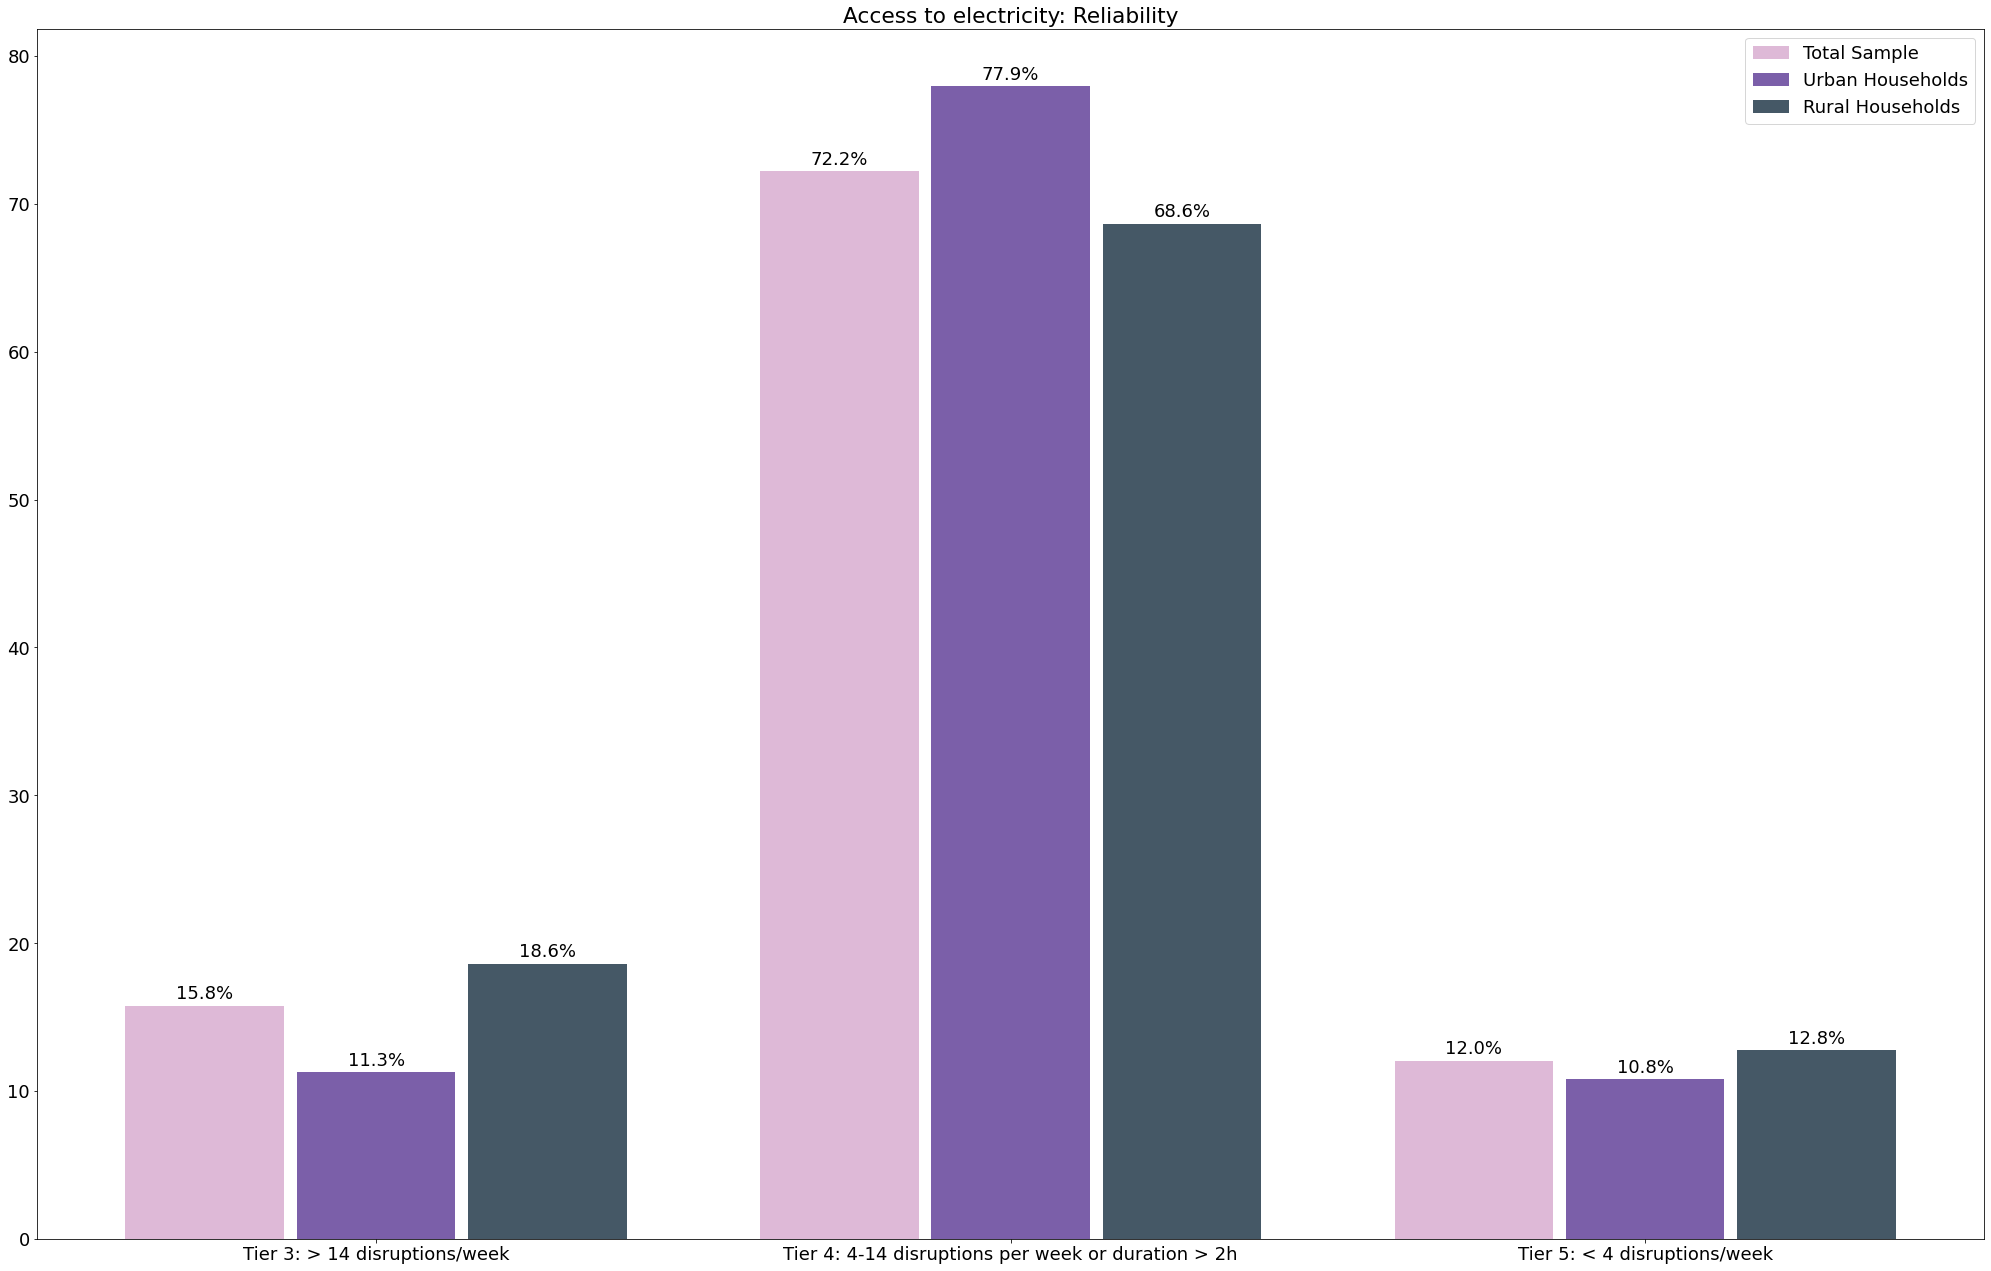

In [11]:
plot_tier_distribution(main,'E_Reliability',values= [3,4,5],
                       labels=['Tier 3: > 14 disruptions/week', 'Tier 4: 4-14 disruptions per week or duration > 2h', 'Tier 5: < 4 disruptions/week' ],
                       title='Access to electricity: Reliability')

## Formality

We consider the question of type:
- **How are you billed for electricity?**

Note that each households only answers depending on the main electricity source.


In [12]:
# TODO: a barplot of the different type of billing for grid-connected and minigrid-connected HH

In [13]:
question_formality = {
    "National Grid": 'C17_How are you billed for electricity',
    "Local Mini Grid":"C57_How are you billed for electricity",    
}

In [14]:
E_Formality = []
for index,row in main.iterrows():
    
    if row[main_source_question]==1:
        billing = row[question_formality["National Grid"]]      
    elif row[main_source_question]==2:
        billing = row[question_formality["Local Mini Grid"]]
    else:
        billing = np.nan

        
    ###########################################################################    
    # TIER COMPUTATION
    ###########################################################################    
    # no bill or "other"
    if billing == 111 or billing == 555:
        E_Formality.append(3)   
    
    elif not(billing == np.nan):
        E_Formality.append(5)   
    
    else:
        E_Formality.append(np.nan)
    
main['E_Formality'] = E_Formality

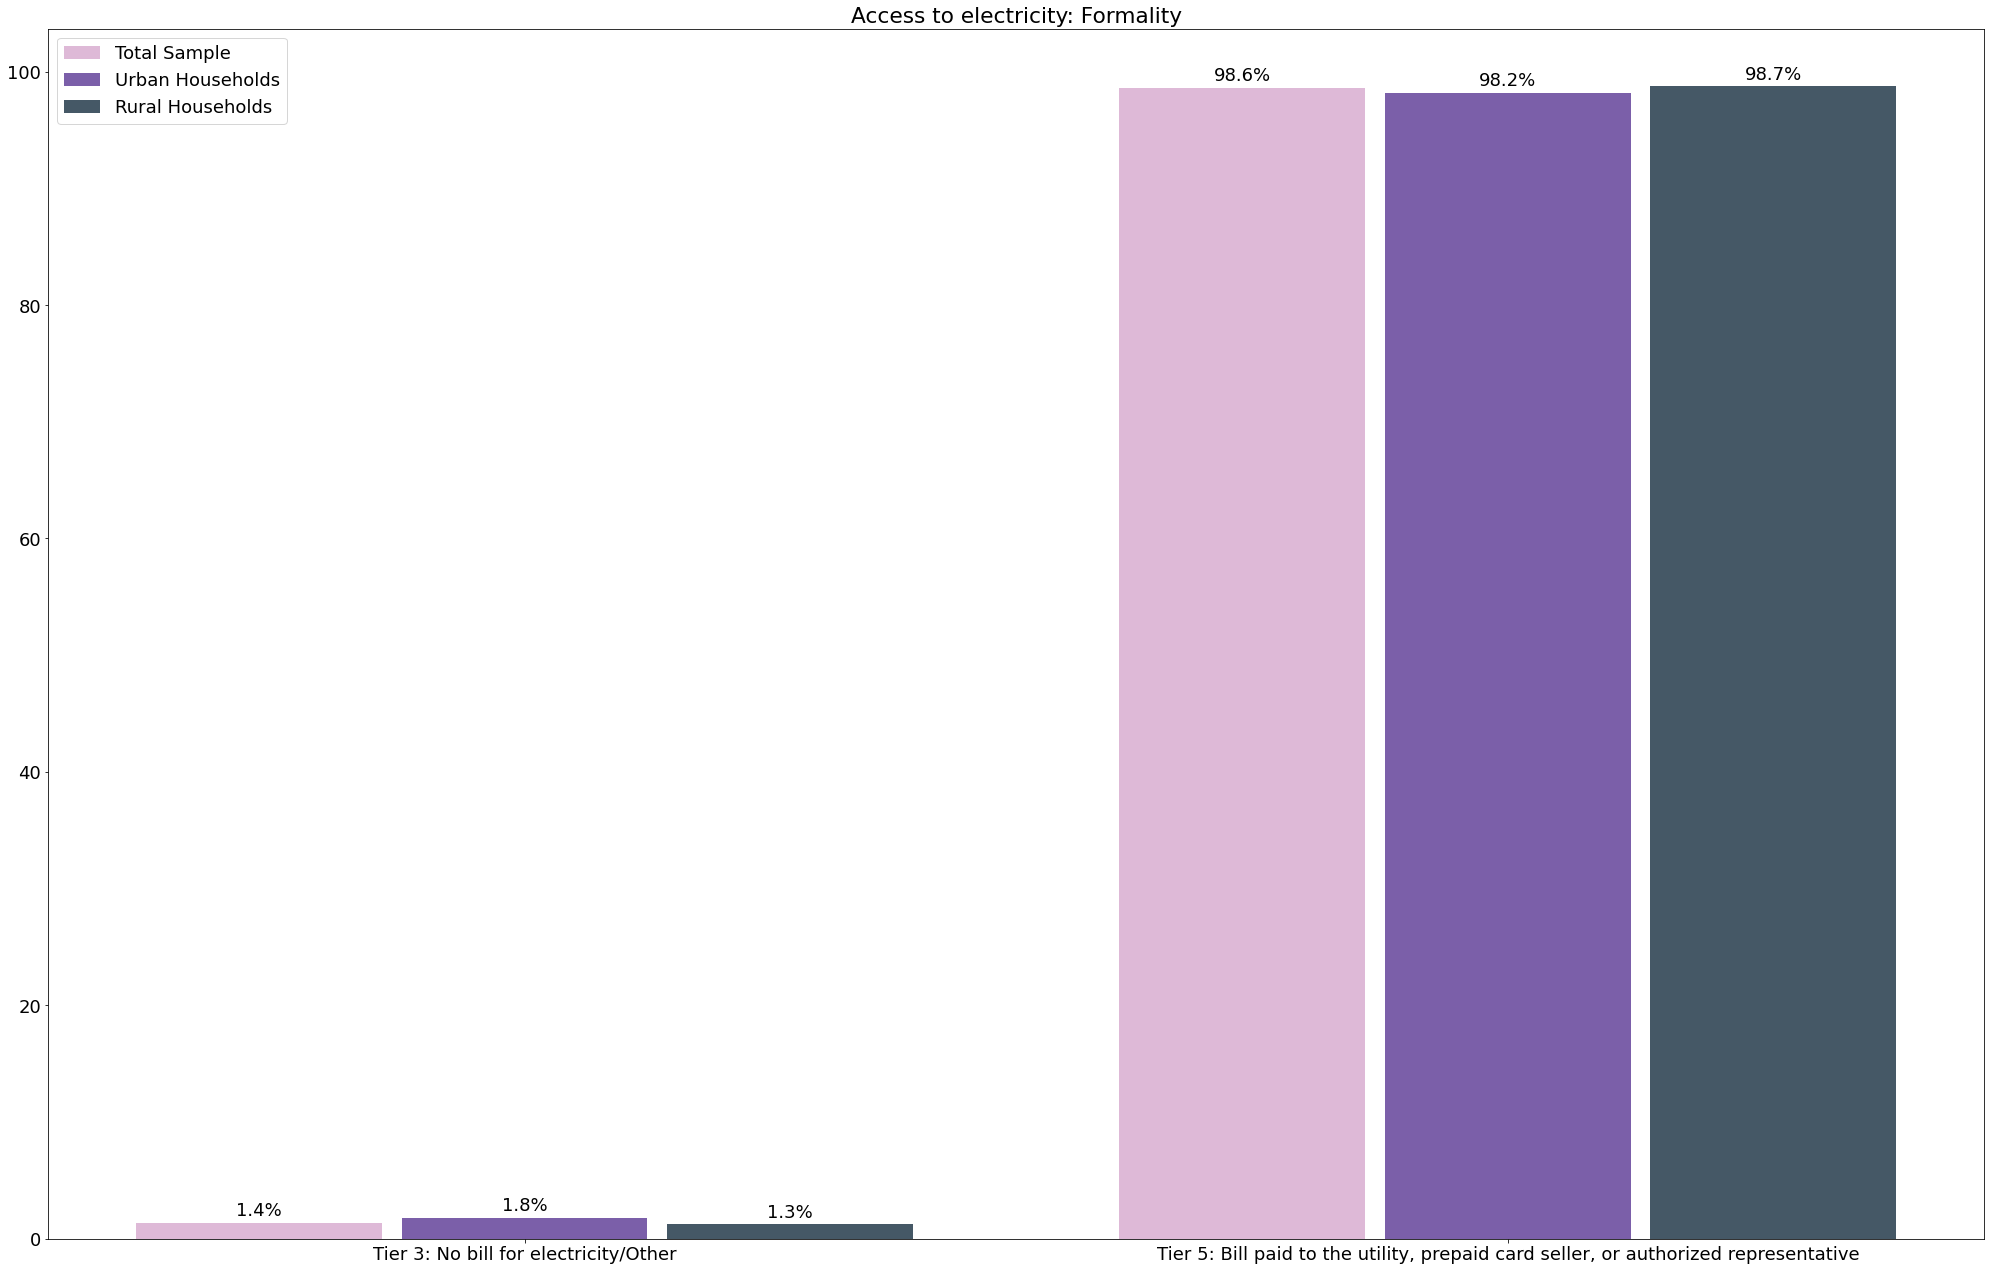

In [15]:
plot_tier_distribution(main,'E_Formality',values= [3,5],
                       labels = ['Tier 3: No bill for electricity/Other', 'Tier 5: Bill paid to the utility, prepaid card seller, or authorized representative' ],
                       title='Access to electricity: Formality')